<h1 style='color:blue'>Carteiro Virtual - Reconhecimento de números escritos a mão</h1>

Vejamos um exemplo concreto de uma rede neural 
para a classificar os números escritos a mão. 

O problema que estamos tentando resolver aqui é classificar imagens em escala de cinza de letras de números escritos a mão de tal forma que depois a gente possa desenvolver um programa que lê um digito que uma pessoa escreveu e o programa tem que dizer qual o número que ela escreveu. 

<img src='correios.jpg' width="50%"/>


***O MNIST***
 
Mnist é um conjunto de dados de imagens, um clássico na comunidade de aprendizagem de máquinas, montado pelo Instituto Nacional de Padrões e Tecnologia (o NIST em MNIST) na década de 1980.

Exemplo das imagens do MNIST
<img src='mnist_examples.png' width="50%"/>

Como está organizado o MNIST
<img src='mnist_img_classe.png' width="30%"/>

### IMPORTANDO O MNIST

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [3]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

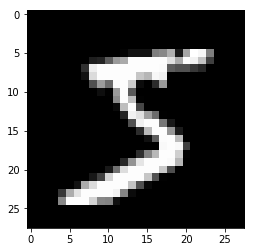

5


In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(train_images[0], cmap='gray')
plt.show()

print(train_labels[0])

In [5]:
## VERIFICANDO O TAMANHO DO DATASET

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### FLATTENING

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

### Normalizando

In [11]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

### Categorizando One Hot Encoder

In [12]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Importando Tensorflow e keras

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers

### Criando a rede neural

In [14]:
model = models.Sequential()
model.add(layers.Dense(32, activation='sigmoid', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


## Criando compilador keras

In [15]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## Treinando a Rede Neural

In [16]:
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.8434 - acc: 0.8253
Epoch 2/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3468 - acc: 0.9093
Epoch 3/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2732 - acc: 0.9239
Epoch 4/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2382 - acc: 0.9335
Epoch 5/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2147 - acc: 0.9396
Epoch 6/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1974 - acc: 0.9443
Epoch 7/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1834 - acc: 0.9479
Epoch 8/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1719 - acc: 0.9506
Epoch 9/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1620 - acc: 0.9533
Epoch 10/10
60000/60000 [=========

## VERIFICANDO A ACURÁCIA DA REDE

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.1634 - acc: 0.9529


In [18]:
print('test_acc:', test_acc)

test_acc: 0.9529


## Salvando o modelo

In [19]:
model.save("mnist-t0.11.h5")